In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

DATA CLEANING


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['target']=label.fit_transform(df['target'])

In [11]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()

,0
target,0
text,0


In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA


In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['target'].value_counts()

,count
target,
0,4825
1,747


([<matplotlib.patches.Wedge at 0x7def21804350>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.59'),
  Text(0.5475662588910611, -0.24529816983428027, '13.41')])

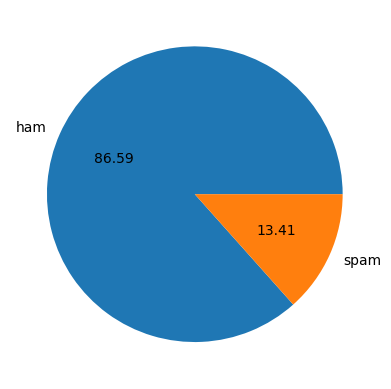

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [16]:
!pip install nltk

In [17]:
import nltk

In [19]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

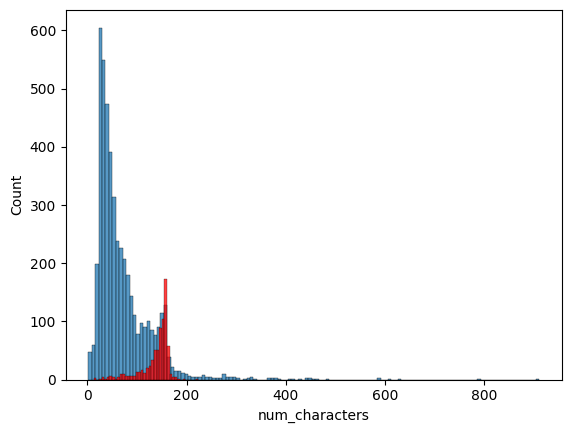

In [33]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

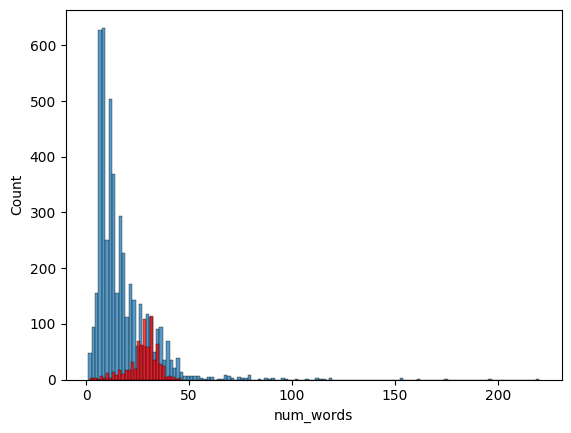

In [34]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

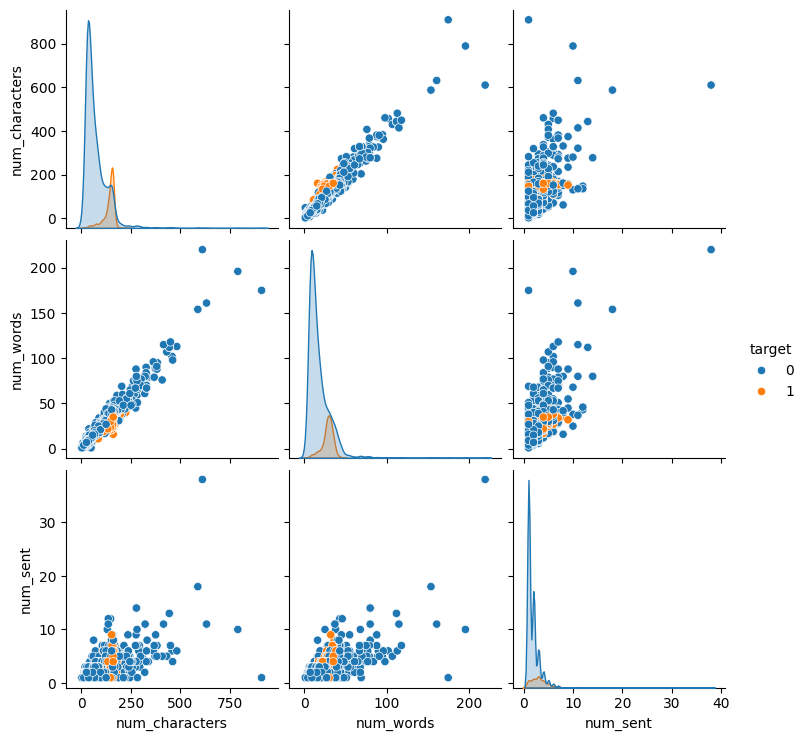

In [35]:
sns.pairplot(df,hue='target')

<Axes: >

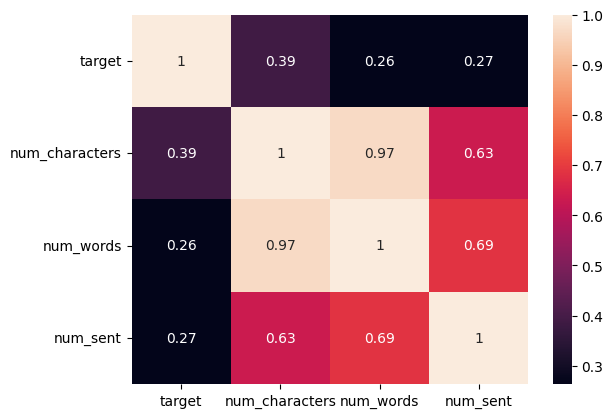

In [36]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


Data Preprocessing


In [37]:
from nltk.corpus import stopwords
import string


In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [42]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [43]:
df['transform_texts']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_characters,num_words,num_sent,transform_texts
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud

In [46]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [47]:
spam_wc=wc.generate(df[df['target']==1]['transform_texts'].str.cat(sep=" "))

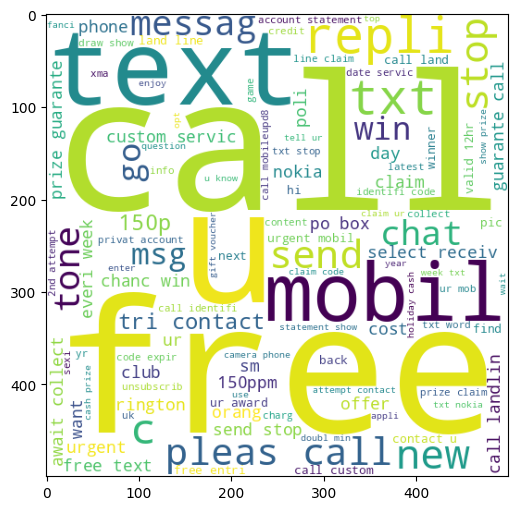

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

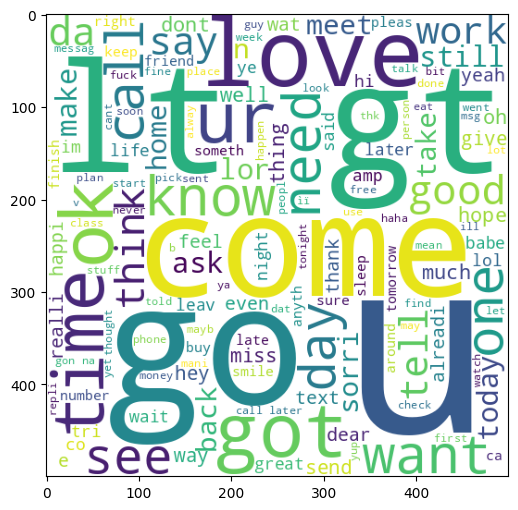

In [49]:
ham_wc=wc.generate(df[df['target']==0]['transform_texts'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sent,transform_texts
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_texts'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [52]:
len(spam_corpus)

11490

In [53]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_texts'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [54]:
len(ham_corpus)

38221

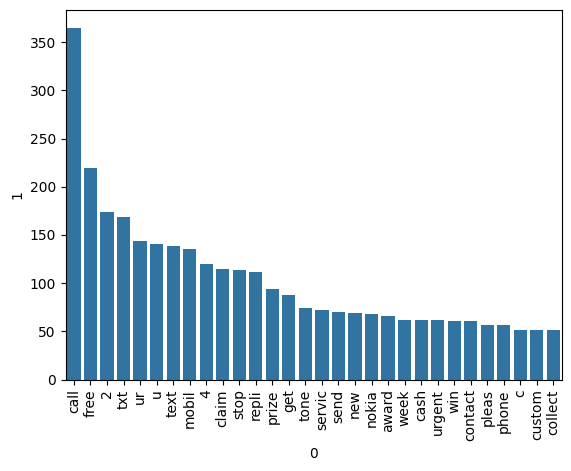

In [55]:
from collections import Counter
common_words=Counter(spam_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(common_words)[0],y=pd.DataFrame(common_words)[1])
plt.xticks(rotation='vertical')
plt.show()


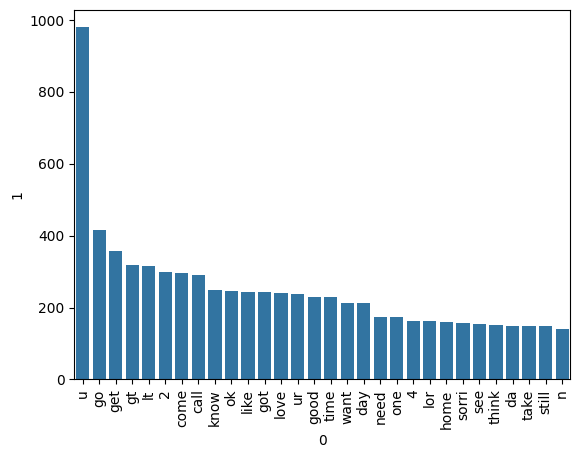

In [56]:
from collections import Counter
common_words=Counter(ham_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(common_words)[0],y=pd.DataFrame(common_words)[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [58]:
X=tfidf.fit_transform(df['transform_texts']).toarray()

In [59]:
X.shape

(5572, 3000)

In [60]:
y=df['target'].values

In [61]:
from sklearn.model_selection import train_test_split


In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix


In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8654708520179372
[[840 117]
 [ 33 125]]
0.5165289256198347


In [66]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [67]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [69]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9721973094170404, 0.9847328244274809)

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9721973094170404
Precision -  0.9847328244274809
For  KN
Accuracy -  0.9049327354260089
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9264573991031391
Precision -  0.8653846153846154
For  LR
Accuracy -  0.9497757847533632
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9695067264573991
Precision -  1.0
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  BgC
Accuracy -  0.9623318385650225
Precision -  0.9328358208955224
For  ETC
Accuracy -  0.9721973094170404
Precision -  1.0
For  GBDT
Accuracy -  0.9399103139013453
Precision -  0.941747572815534
For  xgb
Accuracy -  0.9641255605381166
Precision -  0.9682539682539683


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904933,1.000000
8,ETC,0.972197,1.000000
5,RF,0.969507,1.000000
2,NB,0.965022,0.991736
0,SVC,0.972197,0.984733
10,xgb,0.964126,0.968254
4,LR,0.949776,0.955357
9,GBDT,0.939910,0.941748
7,BgC,0.962332,0.932836
6,AdaBoost,0.912108,0.894737


In [73]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904933
1,ETC,Accuracy,0.972197
2,RF,Accuracy,0.969507
3,NB,Accuracy,0.965022
4,SVC,Accuracy,0.972197
5,xgb,Accuracy,0.964126
6,LR,Accuracy,0.949776
7,GBDT,Accuracy,0.939910
8,BgC,Accuracy,0.962332
9,AdaBoost,Accuracy,0.912108


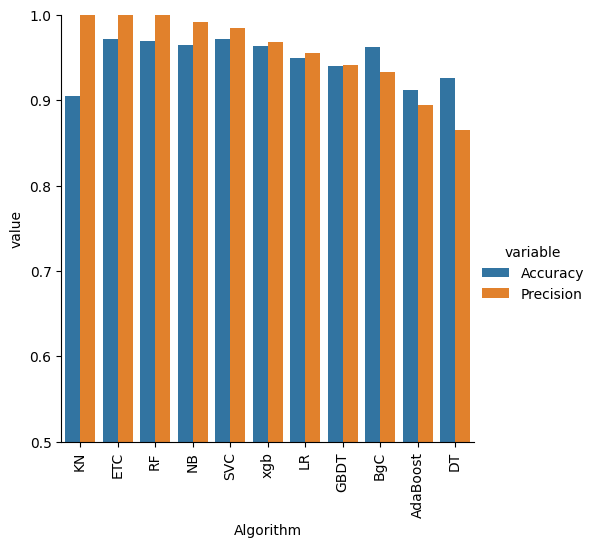

In [74]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
# max_features = 3000
df_max = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores
})

# scaling
df_scaling = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores
})

# num_chars
df_chars = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores
})

# Merge everything
final_df = performance_df \
    .merge(df_max, on='Algorithm') \
    .merge(df_scaling, on='Algorithm') \
    .merge(df_chars, on='Algorithm')


In [76]:
print(final_df)

   Algorithm  Accuracy  Precision  Accuracy_max_ft_3000  \
0         KN  0.904933   1.000000              0.904933   
1        ETC  0.972197   1.000000              0.972197   
2         RF  0.969507   1.000000              0.969507   
3         NB  0.965022   0.991736              0.965022   
4        SVC  0.972197   0.984733              0.972197   
5        xgb  0.964126   0.968254              0.964126   
6         LR  0.949776   0.955357              0.949776   
7       GBDT  0.939910   0.941748              0.939910   
8        BgC  0.962332   0.932836              0.962332   
9   AdaBoost  0.912108   0.894737              0.912108   
10        DT  0.926457   0.865385              0.926457   

    Precision_max_ft_3000  Accuracy_scaling  Precision_scaling  \
0                1.000000          0.904933           1.000000   
1                1.000000          0.972197           1.000000   
2                1.000000          0.969507           1.000000   
3                0.991736  

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [78]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [79]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 1.0


In [80]:
# Train final model properly
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))